In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Gathering, analysing and visualizing the data

Navigating to the dataset and unzipping it for use

In [ ]:
!wget https://www.dropbox.com/s/aogx9w405rkhh5p/CXR_Samples.zip?dl=0

In [ ]:
!unzip /content/CXR_Samples.zip?dl=0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

import os
import shutil
import glob

Storing the path of the root directory, a directory named "all_images" where we will copy all the images 

Also creating an array storing the class names

In [ ]:
ROOT_DIR="/content/CXR Samples"
images=["COVID","Normal","Pneumonia","Tuberculosis"]

NEW_DIR="/content/all_images/"

Copying all the images to the new directory created

In [ ]:
if not os.path.exists(NEW_DIR):
  os.mkdir(NEW_DIR)

for i in images:
    org_dir = os.path.join(ROOT_DIR, i+"/")
    
    for imgfile in glob.iglob(os.path.join(org_dir, "*.png")):
      shutil.copy(imgfile, NEW_DIR)
      
else:
  print("Folder already exists")

Folder already exists


Obtain the Image count

In [ ]:
counter = {'COVID':0,'Normal':0,'Pneumonia' :0, 'Tuberculosis' :0}

for image in images:
  for count in glob.iglob(NEW_DIR+image+"*"):
    counter[image] += 1

counter

{'COVID': 559, 'Normal': 1585, 'Pneumonia': 4273, 'Tuberculosis': 700}

Visualizing the count in the form of a bar graph

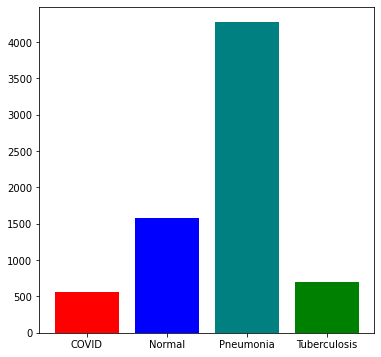

In [ ]:
c = ['red', 'blue', 'teal', 'green']

plt.figure(figsize=(6,6))
plt.bar(x = counter.keys(), height= counter.values(), color= c)

plt.show()


# Data Splitting

First, we create a sub-directory within 'all_images' where we split the data into 3 sets: Training data, Testing data and Validation Data.

Count of images for each class type is different. So we will choose only a fixed number of images from each class for training, validation and testing purpose.

The division of images is as follows:

**Training data** contains **350 Samples** from each class

**Testing data** contains **50 Samples** from each class

**Validation data** contains **100 Samples** from each class 

In [ ]:
if not os.path.exists(NEW_DIR+"train_test_split/"):
  os.makedirs(NEW_DIR+"train_test_split/")

  os.makedirs(NEW_DIR+"train_test_split/train/Covid")
  os.makedirs(NEW_DIR+"train_test_split/train/Normal")
  os.makedirs(NEW_DIR+"train_test_split/train/Pneumonia")
  os.makedirs(NEW_DIR+"train_test_split/train/Tuberculosis")

  os.makedirs(NEW_DIR+"train_test_split/test/Covid")
  os.makedirs(NEW_DIR+"train_test_split/test/Normal")
  os.makedirs(NEW_DIR+"train_test_split/test/Pneumonia")
  os.makedirs(NEW_DIR+"train_test_split/test/Tuberculosis")

  os.makedirs(NEW_DIR+"train_test_split/validation/Covid")
  os.makedirs(NEW_DIR+"train_test_split/validation/Normal")
  os.makedirs(NEW_DIR+"train_test_split/validation/Pneumonia")
  os.makedirs(NEW_DIR+"train_test_split/validation/Tuberculosis")

  # Training Data
  for i in np.random.choice(replace= False , size= 350 , a = glob.glob(NEW_DIR+images[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 350 , a = glob.glob(NEW_DIR+images[1]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 350 , a = glob.glob(NEW_DIR+images[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Pneumonia" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 350 , a = glob.glob(NEW_DIR+images[3]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Tuberculosis" )
    os.remove(i)




 # Validation Data
  for i in np.random.choice(replace= False , size= 100 , a = glob.glob(NEW_DIR+images[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 100 , a = glob.glob(NEW_DIR+images[1]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 100 , a = glob.glob(NEW_DIR+images[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Pneumonia" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 100 , a = glob.glob(NEW_DIR+images[3]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Tuberculosis" )
    os.remove(i)



 
 # Test Data
  for i in np.random.choice(replace= False , size= 50 , a = glob.glob(NEW_DIR+images[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 50 , a = glob.glob(NEW_DIR+images[1]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 50 , a = glob.glob(NEW_DIR+images[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Pneumonia" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 50 , a = glob.glob(NEW_DIR+images[3]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Tuberculosis" )
    os.remove(i)

Storing the paths of the directories in which we splitted the data into 3 variables

In [ ]:
train_path  = "/content/all_images/train_test_split/train"
valid_path  = "/content/all_images/train_test_split/validation"
test_path   = "/content/all_images/train_test_split/test"

# Data Augmentation

Importing deep learning layers and models

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50
from keras.models import Model
from keras.layers import Flatten , Dense, Dropout , MaxPool2D
import keras

For training our model, we will be including some augmentation like zooming, horizontal flipping and shearing such that the model is trained on all forms of image data.

In [ ]:
train_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input, 
                                    zoom_range= 0.2, 
                                    horizontal_flip= True, 
                                    shear_range= 0.2
                                    
                                    ) 

train = train_data_gen.flow_from_directory(directory= train_path, 
                                           target_size=(224,224))

Found 1400 images belonging to 4 classes.


In [ ]:
validation_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input  )

valid = validation_data_gen.flow_from_directory(directory= valid_path, 
                                                target_size=(224,224))

Found 400 images belonging to 4 classes.


In [ ]:
test_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input )

test = train_data_gen.flow_from_directory(directory= test_path , 
                                          target_size=(224,224), 
                                          shuffle= False)

Found 200 images belonging to 4 classes.


In [ ]:
class_type = {0:'Covid',  1:'Normal', 2:'Pneumonia', 3:'Tuberculosis'}

# Our Model: ResNet50

In [ ]:
res = ResNet50( input_shape=(224,224,3), include_top= False)

94765736/94765736 [==============================] - 3s 0us/step


Schematic Diagram of ResNet50 model

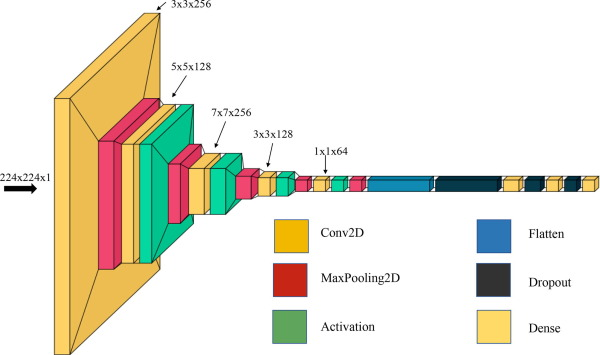

In [ ]:
for layer in res.layers:           
  layer.trainable = False

After all the layers have been applied, the result is a multi-dimensional matrix. We must transform this into a matrix that is in the shape of the required output.

Flatten Layer flattens the input images.

Dense layer classifies the images based on output from convolutional layers.

In [ ]:
x = Flatten()(res.output)
x = Dense(units=4 , activation='softmax', name = 'predictions' )(x)


model = Model(res.input, x)

In [ ]:
model.summary()

In [ ]:
model = Model(inputs = res.input, outputs = x)

In [ ]:
model.compile( optimizer= 'adam' , loss = 'categorical_crossentropy', metrics=['accuracy'])

# Training the Model

EarlyStopping class stops the model from training when a monitored metric has stopped improving. Here, we monitor validation accuracy.

min_delta: Minimum change in the monitored quantity to qualify as an improvement

patience: Number of epochs with no improvement after which training will be stopped.

ModelCheckpoint class is used to save the model for later use.

save_best_only= True : saves when the model is considered the "best"

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

Training the model with suitable parameters. Here, we train the model for 30 epochs. However, the model will stop training as soon as no change is observed in the 'validation accuracy' for 3 continuous epochs. 

By this, we will avoid Model Overfitting

In [ ]:
hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 30, validation_data= valid , callbacks=[es,mc])

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 10.8768 - accuracy: 0.5994
Epoch 1: val_accuracy improved from -inf to 0.84000, saving model to bestmodel.h5
10/10 [==============================] - 25s 1s/step - loss: 10.8768 - accuracy: 0.5994 - val_loss: 3.9219 - val_accuracy: 0.8400
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 4.0913 - accuracy: 0.8365
Epoch 2: val_accuracy improved from 0.84000 to 0.87750, saving model to bestmodel.h5
10/10 [==============================] - 6s 645ms/step - loss: 4.0913 - accuracy: 0.8365 - val_loss: 2.9464 - val_accuracy: 0.8775
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 1.9624 - accuracy: 0.9062
Epoch 3: val_accuracy improved from 0.87750 to 0.92500, saving model to bestmodel.h5
10/10 [==============================] - 7s 677ms/step - loss: 1.9624 - accuracy: 0.9062 - val_loss: 1.8040 - val_accuracy: 0.9250
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 1.775

In [ ]:
from keras.models import load_model
model = load_model("bestmodel.h5")

In [ ]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Visualizations

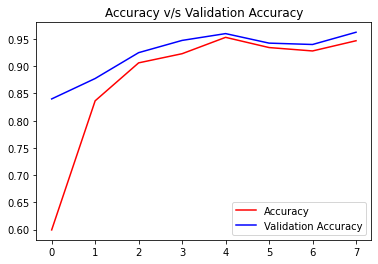

In [ ]:
plt.plot(h['accuracy'],'r-', label='Accuracy')
plt.plot(h['val_accuracy'] ,'b-',label='Validation Accuracy')
plt.title("Accuracy v/s Validation Accuracy")
plt.legend()
plt.show()

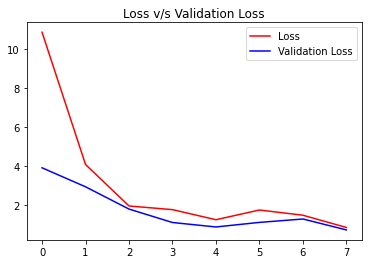

In [ ]:
plt.plot(h['loss'],'r-', label='Loss')
plt.plot(h['val_loss'] ,'b-',label='Validation Loss')
plt.title("Loss v/s Validation Loss")
plt.legend()
plt.show()

# Performance Testing

Results are based on accuracy that was achieverd on the Testing Data

In [ ]:
acc = model.evaluate_generator(generator= test)[1] 

print(f"Model Accuracy = {acc*100} %")

Model Accuracy = 95.49999833106995 %


# Predictions on a random sample chosen from the Dataset

In [ ]:
from keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.cm as cm

from IPython.display import Image, display

def get_img_array(img_path):
  """
  Input : Takes in image path as input 
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = load_img(path, target_size=(224,224,3))
  img = img_to_array(img)
  img = np.expand_dims(img , axis= 0 )
  
  return img

1/1 [==============================] - 0s 82ms/step
The CXR image is of type: Pneumonia



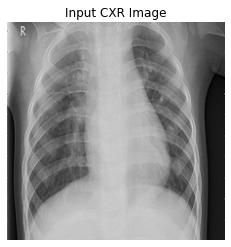

In [ ]:

path = "/content/all_images/train_test_split/test/Pneumonia/Pneumonia (1762).png"       


img = get_img_array(path)

res = class_type[np.argmax(model.predict(img))]
print(f"The CXR image is of type: {res}")
print()
#print(f"The chances of CXR Iamge being a COVID Sample is : {model.predict(img)[0][0]*100} %")
#print()
#print(f"The chances of CXR Image being Normal is : {model.predict(img)[0][1]*100} %")
#print()
 
plt.imshow(img[0]/255, cmap = "gray")
plt.title("Input CXR Image")
plt.axis('off')
plt.show()